# Symbolic computation of Sine Ridge:

The goal is to create a vector field that has a closed-form expression for the FTLE field, but already displays nontrivial spatial dependence. 

Start with a simple system that has a closed form expression for the flowmap (and also the FTLE field).
$$\dot{x} = x - x^3 \\ \dot{y} = 1 $$
This system can be integrated, and it can be seen that it has an FTLE ridge along the $y$ axis. 

Now introduce a coordinate transform 

$$
(x,y) = w(u, v).
$$

The vector field in the new coordinates can be obtained by differentiating the expression:
$$
\dot{(w(u,v))} = f(w(u,v))
$$

$$
\nabla w \dot{(u,v)} = f(w(u,v)) \\
\dot{(u,v)} = (\nabla w)^{-1} f(w(u,v))
$$

If the flow map of the $(x,y)$ system is $F_{t_0}^t (x_0,y_0)$, the transformed system's becomes

$$
(F_{t_0}^t(u_0,v_0))' = w^{-1}\circ F_{t_0}^t \circ w(u_0,v_0)
$$

For the particular example, we have

$$F_{t_0}^t(x_0,y_0) = \left(\frac{x_0}{\sqrt{x_0^2 + (1-x_0^2)e^{-2(t-t_0)}}}, y_0 + t-t_0 \right)$$.

Let's introduce the transformation 
$$
(x,y) := w(u,v) = (u - \sin v, v) \\
w^{-1}(x,y) = (x + \sin y, y).
$$

Under this, the flow map transforms into

$$
(F_{t_0}^t(u_0,v_0))' = \left( \frac{u_0 - \sin v_0}{\sqrt{(u_0 - \sin v_0)^2 + [1-(u_0 -\sin v_0)^2]e^{-2(t-t_0)}}} + \sin (v_0 + t-t_0), v_0 + t-t_0 \right)
$$

From this, we can calculate the flow map gradient, and the Cauchy-Green strain tensor


$\nabla (F^_{t_0}^t(u_0,v_0))'$ = 
\begin{bmatrix}
    \frac{\partial (F_{t_0}^t(u_0,v_0))'_1}{\partial u_0} & \frac{\partial (F_{t_0}^t(u_0,v_0))'_1}{\partial v_0} \\
    \frac{\partial (F_{t_0}^t(u_0,v_0))'_2}{\partial u_0} & \frac{\partial (F_{t_0}^t(u_0,v_0))'_2}{\partial v_0}
\end{bmatrix}

$$
C_{t_0}^t(u_0,v_0) = [\nabla (F_{t_0}^t(u_0,v_0))']^T\nabla (F_{t_0}^t(u_0,v_0))'.
$$

Its maximal eigenvalue gives the FTLE field:
$$
\lambda_2 = \frac{\text{tr}(C) + \sqrt{(\text{tr}(C)^2 - 4\text{det}(C)}}{2} \\
\text{FTLE}(t,t_0, u_0,v_0) = \frac{\text{log} \lambda_2}{2 (t-t_0)}
$$


In [12]:
from sympy import init_printing
init_printing()
import numpy as np

import matplotlib.pyplot as plt

In [13]:
from sympy import init_session
init_session()

IPython console for SymPy 1.4 (Python 3.7.4-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



In [21]:

## This is the flowmap for x' = x - x^3
x0, t1, t2 = symbols('x0 t1 t2')
def FlowMapx(x0, t2):
    denom = sqrt(x0**2 + (1 - x0**2)*exp(-2*t2))
    return x0/denom
FlowMapxx = FlowMapx(x0, t2)



In [29]:
u, v, t1, t2 = symbols('u v t1 t2')
def FlowMap1(u, v,t1, t2):
    denom = sqrt((u-sin(v))**2 + (1 - (u - sin(v))**2)*exp(-2*(t2-t1)))
    return (u-sin(v))/denom + sin(v + (t2-t1))
FlowMapX = FlowMap1(u, v, t1, t2)

def FlowMap2(u,v,t1, t2):
    return v + t2 - t1
FlowMapY = FlowMap2(u, v, t1, t2)

$$ 
F(u_0,v_0,t_1, t_2)_1 =
$$

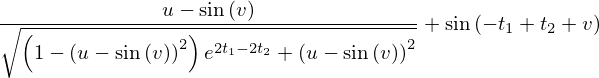

In [36]:
FlowMapX

Checking that the original flowmap satisfies the differential equation:

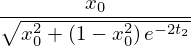

In [27]:
FlowMapxx

In [28]:
simplify(diff(FlowMapxx, t2) - (FlowMapxx -FlowMapxx**3))

$$ 
F(u_0,v_0,t_1, t2)_2 =
$$

In [37]:
FlowMapY

In [30]:
fxx = simplify(diff(FlowMapX, u))
fxy = simplify(diff(FlowMapX, v))
fyx = diff(FlowMapY, u)
fyy = diff(FlowMapY, v)

Flowmap Gradient is


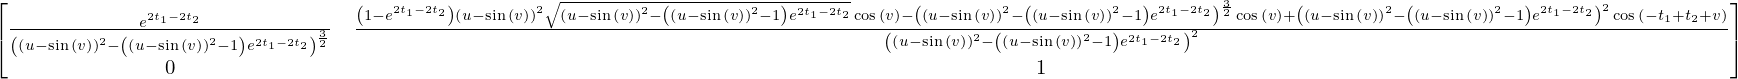

In [31]:
dF = Matrix([[fxx, fxy], [fyx, fyy]])
dF

Cauchy Green tensor

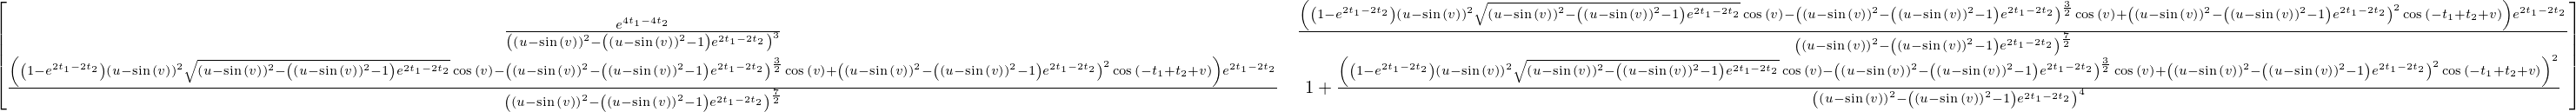

In [32]:
C = dF.T*dF
C

Eigenvalues, calculating it explicitly with the trace-determinant formula

In [33]:
tr = trace(C)
tr = simplify(tr)
determ = det(C)
determ = simplify(determ)

In [34]:
lambdaMax = (tr + sqrt(tr**2 - 4*determ))/2

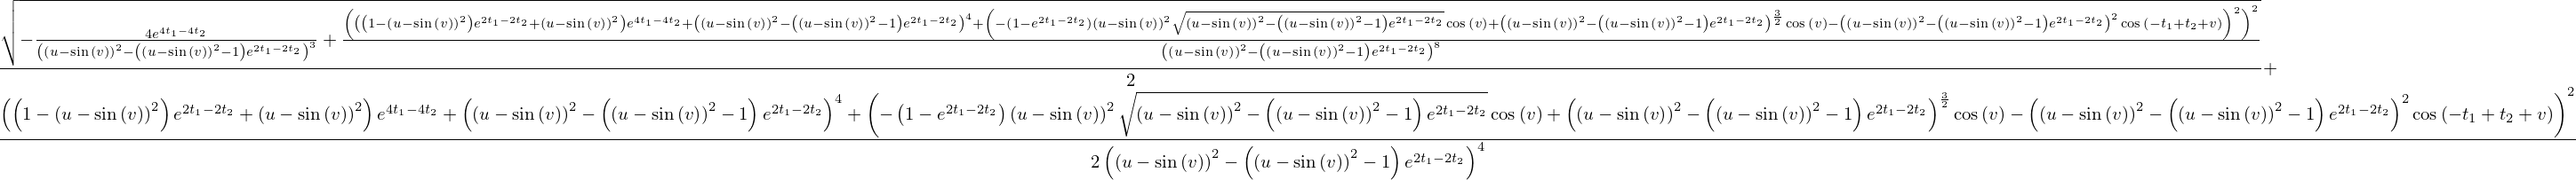

In [35]:
lambdaMax

## Checking FTLE values analytically

In [41]:
lambdaMax.free_symbols
f = lambdify((u,v,t1,t2), lambdaMax, 'numpy')

Creating meshgrid for visuals. Display on a grid of 1000 by 1000.

In [82]:
nx, ny = (100, 200)
unum = np.linspace(-2, 2, nx)
vnum = np.linspace(-4, 4, ny)
U, V = np.meshgrid(unum,vnum)

In [87]:
V.shape

Calculating FTLE values for $t_0=0, t=2$. Saving the result in a matrix for MATLAB processing

In [44]:
time = 2
FTLE = np.log(f(U,V, 0,time))/(2*time)

In [45]:
%matplotlib inline

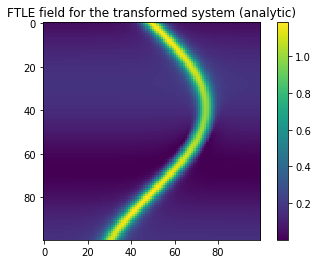

In [48]:
plt.imshow(FTLE)
plt.title('FTLE field for the transformed system (analytic)')
plt.colorbar()

## Transformation of the vectorfield 

The vector field transforms according to 

$$
\dot{(u,v)} = (\nabla w)^{-1} f(w(u,v)).
$$

Substituting the specific transformation and original vector fields:

$$
\nabla w =$$
\begin{bmatrix}
    1 & -cos v \\
    0 & 1
\end{bmatrix} 
$$(\nabla w)^{-1} =$$ 
\begin{bmatrix}
    1 & cos v \\
    0 & 1
\end{bmatrix} 

$$
\dot{u} = u - \sin v - (u - \sin v)^3 + \cos v \\
\dot{v} = 1
$$

In [49]:
finiteDiff = np.loadtxt('FTLE_finiteDiff.txt')

## Displaying the difference between the analytic and the finite difference FTLE fields

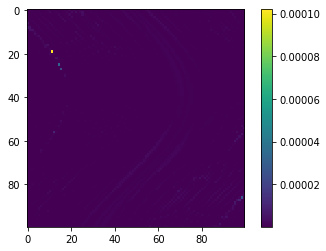

In [50]:
plt.imshow(np.abs(finiteDiff-FTLE))
plt.colorbar()

# Calculation of Model Sensitvity

$$
\text{MS}_{t_0}^t (u_0,v_0) = \int_{t_0}^t \sqrt{\lambda_2[u(s),v(s)]_s^t } ds
$$

$$
u(s) = F_{t_0}^s(u_0,v_0)_1 \\
v(s) = F_{t_0}^s(u_0,v_0)_2 \\
$$

In [59]:
u0 = Symbol('u0')
v0 = Symbol('v0')
s = Symbol('s')
t = Symbol('t')
t0 = Symbol('t0')


us = FlowMapX.subs([(u, u0), (v, v0), (t1, t0), (t2, s)])
vs = FlowMapY.subs([(u, u0), (v, v0), (t1, t0), (t2, s)])

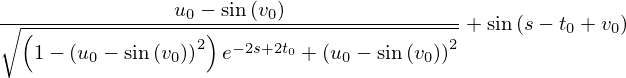

In [60]:
us

In [61]:
vs

Calculating the pullback-FTLE, that is FTLE along the trajectory:

In [63]:
lambdaMax.free_symbols

In [64]:
lambdaAlongTraj = lambdaMax.subs([(u,us), (v,vs), (t1,s), (t2, t)])

In [65]:
lambdaAlongTraj.free_symbols

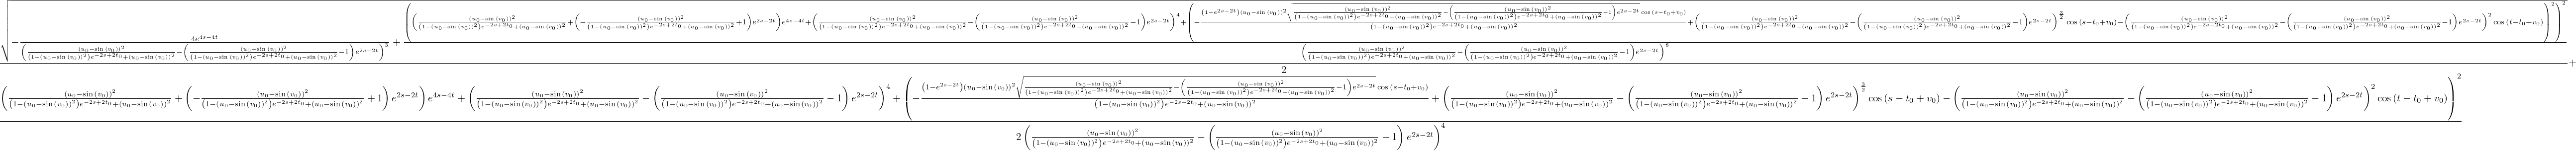

In [66]:
lambdaAlongTraj

In [68]:
lambdaAlongTrajNumeric = lambdify((s,t,t0,u0,v0), lambdaAlongTraj, 'numpy') ##Converting the symbolic expression to callable numeric one

In [121]:
integrate_times =np.arange(0, 2, 2./100.)
n = len(integrate_times)
values = np.zeros((ny,nx,n))

The pullback-FTLE is integrated:

$$
\text{MS}^\tau (u_0,v_0) = \int_0^\tau \sqrt{\lambda_2[u(s),v(s)]} ds = \int_0^\tau f(u_0,v_0,s,\tau) ds
$$
Checking that we recover the FTLE field as:
$$
\text{log}(f(u_0,v_0,0,\tau))/\tau = FTLE^\tau(u_0,v_0).
$$

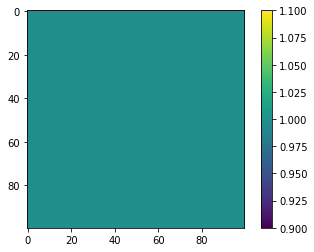

In [172]:
ftle2 = lambdaAlongTrajNumeric(U,V, 2., 2.)
#ftle2 = np.log(ftle2)/4
plt.imshow(ftle2)
plt.colorbar()

Evaluating the function at fixed time instants

In [122]:
for i in range(n):
    values[:,:,i] = np.sqrt(lambdaAlongTrajNumeric(integrate_times[i],2,0,U,V))

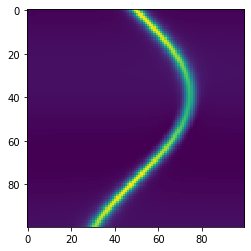

In [118]:
plt.imshow(values[:,:,0]) ##Checking that we recover the FTLE field again

Computing the model sensitivity through numerical integration

In [123]:
MS = np.trapz(values, x = integrate_times, axis = 2)

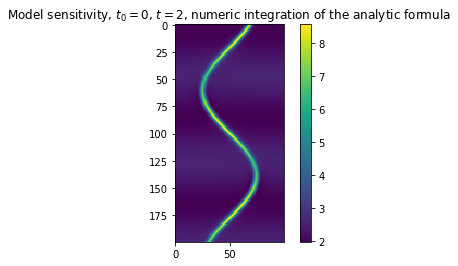

In [110]:
plt.imshow(MS)
plt.title('Model sensitivity, $t_0=0$, $t=2$, numeric integration of the analytic formula')
plt.colorbar()

Loading numerical results from matlab:

In [77]:

MSFiniteDiff = np.loadtxt('MS_finiteDiff_sine.txt')
MSFullFiniteDiff = np.loadtxt('MSFull_finiteDiff_sine.txt')

MSEov = np.loadtxt('MS_eov_sine.txt')
MSFullEov = np.loadtxt('MSFull_eov_sine.txt')



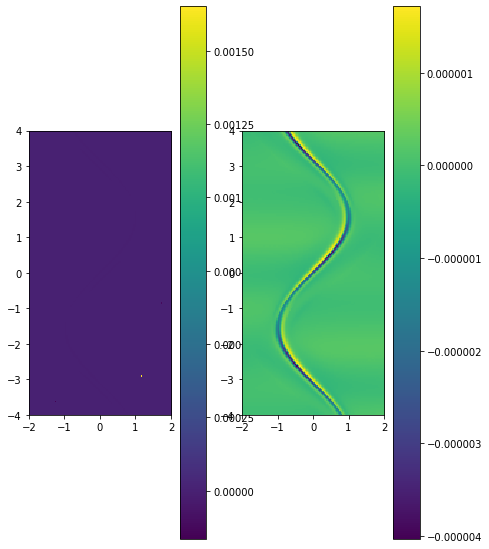

In [127]:
plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
plt.imshow((MS-MSFiniteDiff),origin='lower', extent=[-2, 2, -4, 4])
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow((MS-MSEov),origin='lower', extent=[-2, 2, -4, 4])
plt.colorbar()

